In [91]:
#Basic Imports
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import  RandomForestClassifier

import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
df2012 = pd.read_stata('data/SETUPS2012/SETUPS2012.dta')
df2016 = pd.read_stata('data/SETUPS2016/SETUPS2016.dta')
df2020 = pd.read_stata('data/SETUPS2020/SETUPS2020.dta')

In [52]:
df2012.drop(['CASEID','WEIGHT_FULL'], axis=1, inplace=True)
df2016.drop(['CASEID','WEIGHT'], axis=1, inplace=True)
df2020.drop(['CASEID','WEIGHT'], axis=1, inplace=True)

In [53]:
df2012.shape, df2016.shape, df2020.shape

((5914, 193), (3649, 202), (7453, 255))

In [54]:
def get_columns(df):
    dictionary = {}
    import string
    alphabet = list(string.ascii_uppercase[0:26])
    for char in alphabet:
        dictionary[char] = []
        for num in list(range(df.shape[1])):
            if df.columns[num].startswith(char):
                dictionary[char].append(df.columns[num])
    return dictionary

In [55]:
_2012_dictionary = get_columns(df2012)
_2016_dictionary = get_columns(df2016)
_2020_dictionary = get_columns(df2020)

In [56]:
_2020_dictionary

{'A': ['A01',
  'A02',
  'A03',
  'A04',
  'A05',
  'A06',
  'A07',
  'A08',
  'A09',
  'A10',
  'A11',
  'A12',
  'A13',
  'A14',
  'A15',
  'A16',
  'A17',
  'A18'],
 'B': ['B01',
  'B02',
  'B03',
  'B04',
  'B05',
  'B06',
  'B07',
  'B08',
  'B09',
  'B10',
  'B11',
  'B12',
  'B13',
  'B14',
  'B15',
  'B16',
  'B17',
  'B18',
  'B19',
  'B20',
  'B21',
  'B22',
  'B23'],
 'C': ['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07'],
 'D': ['D01',
  'D02',
  'D03',
  'D04',
  'D05',
  'D06',
  'D07',
  'D08',
  'D09A',
  'D09B',
  'D10A',
  'D10B',
  'D11A',
  'D11B',
  'D12A',
  'D12B',
  'D13'],
 'E': ['E01',
  'E02',
  'E03',
  'E04',
  'E05',
  'E06',
  'E07',
  'E08',
  'E09',
  'E10',
  'E11',
  'E12',
  'E13',
  'E14',
  'E15',
  'E16'],
 'F': ['F01',
  'F02',
  'F03',
  'F04',
  'F05',
  'F06',
  'F07',
  'F08',
  'F09',
  'F10',
  'F11',
  'F12',
  'F13',
  'F14',
  'F15',
  'F16',
  'F17',
  'F18',
  'F19',
  'F20',
  'F21',
  'F22',
  'F23',
  'F24',
  'F25',
  'F26',
  'F27

In [57]:
# drop = ['9. NA', '5. Other candidate {SPECIFY}', '3. Jo Jorgensen', '4. Howie Hawkins']

In [58]:
# df2020.drop(df2020[df2020['A02'] == drop[0]].index, inplace = True)
# df2020.drop(df2020[df2020['A02'] == drop[1]].index, inplace = True)
# df2020.drop(df2020[df2020['A02'] == drop[2]].index, inplace = True)
# df2020.drop(df2020[df2020['A02'] == drop[3]].index, inplace = True)

In [59]:
df2020_Voting_Behavior = df2020.loc[:,df2020.columns.str.startswith('B')]

In [61]:
y = df2020['A02']
X = df2020_Voting_Behavior

In [14]:
df2020_Voting_Behavior['A07'].cat.codes

0       1
1       2
2       4
3       1
4       2
       ..
7448    1
7449    1
7450    0
7451    4
7452    4
Length: 7453, dtype: int8

In [15]:
df2020_Voting_Behavior['A07b'] = df2020_Voting_Behavior['A07'].cat.codes

<ipython-input-15-e58aa57748ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020_Voting_Behavior['A07b'] = df2020_Voting_Behavior['A07'].cat.codes


In [16]:
df2020_Voting_Behavior_code = df2020_Voting_Behavior

In [17]:
df2020_Voting_Behavior_code = df2020_Voting_Behavior_code[['A01',
  'A02',
  'A03',
  'A04',
  'A05',
  'A06',
  'A07',
  'A08',
  'A09',
  'A10',
  'A11',
  'A12',
  'A13',
  'A14',
  'A15',
  'A16',
  'A17',
  'A18']].apply(lambda x: x.astype('category').cat.codes)

In [18]:
df2020_Voting_Behavior_code["A06"].value_counts()

0    1796
6    1545
2     881
3     876
1     789
4     782
5     759
7      25
Name: A06, dtype: int64

In [19]:
df2020_Voting_Behavior["A06"].cat.categories


Index(['1. Strong Democrat', '2. Not very strong Democrat',
       '3. Independent-Democrat', '4. Independent',
       '5. Independent-Republican', '6. Not very strong Republican',
       '7. Strong Republican', '9. NA'],
      dtype='object')

In [20]:
df2020_Voting_Behavior['A07b'].value_counts()

4    3607
0    1690
1    1193
2     932
3      31
Name: A07b, dtype: int64

In [62]:
categorical_columns = _2020_dictionary['B']
numerical_columns = []

In [63]:
X = X[categorical_columns + numerical_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_processing = OneHotEncoder(handle_unknown='ignore')
numerical_pipe = SimpleImputer(strategy="mean")

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_processing, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ],
    verbose_feature_names_out=False,
)

pipe = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['B01', 'B02', 'B03', 'B04',
                                                   'B05', 'B06', 'B07', 'B08',
                                                   'B09', 'B10', 'B11', 'B12',
                                                   'B13', 'B14', 'B15', 'B16',
                                                   'B17', 'B18', 'B19', 'B20',
                                                   'B21', 'B22', 'B23']),
                                                 ('num', SimpleImputer(), [])],
                                   verbose_feature_names_out=False)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [114]:
param_grid = {'classifier__n_estimators':np.arange(50,200,15),
              'classifier__max_features':np.arange(0.1, 1, 0.1),
              'classifier__max_depth': [3, 5, 7, 9],
              'classifier__max_samples': [0.3, 0.5, 0.8]}

In [115]:
gridsearch = GridSearchCV(estimator=pipe, 
                          param_grid=param_grid, 
                          scoring='accuracy', 
                          cv=5)

In [116]:
# Fit the training data
gridsearch.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch.score(X_test, y_test)

KeyboardInterrupt: 

In [85]:
print(f"RF train accuracy: {pipe.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {pipe.score(X_test, y_test):.3f}")

RF train accuracy: 0.908
RF test accuracy: 0.473


In [86]:
feature_names = pipe[:-1].get_feature_names_out()

mdi_importances = pd.Series(
    pipe[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

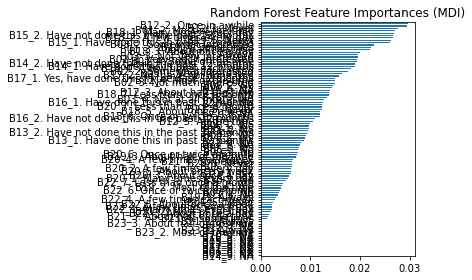

In [87]:
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

# Decision Tree

In [68]:
X = pd.get_dummies(X)

In [69]:
data_train, data_test, target_train, target_test = train_test_split(X, y, random_state=42)

In [70]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5)

In [71]:
DecisionTreeClassifier(max_depth=5)

DecisionTreeClassifier(max_depth=5)

In [72]:
pd.Series(tree_clf.feature_importances_, index=X.columns).nlargest(5)

B02_1. Very much interested                0.245418
B23_9. NA                                  0.136032
B11_1. Yes                                 0.109847
B13_1. Have done this in past 12 months    0.077416
B01_4. Some of the time                    0.075435
dtype: float64

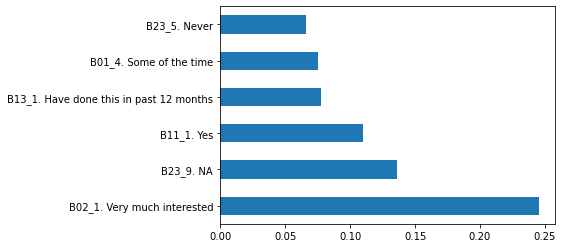

In [73]:
def plot_feature_importances(model, num):
    pd.Series(model.feature_importances_, index=X.columns).nlargest(num).plot(kind='barh',) 

plot_feature_importances(tree_clf, 6)

In [74]:
tree_clf.feature_importances_

array([0.00599921, 0.00740997, 0.00540421, 0.0754352 , 0.        ,
       0.        , 0.24541825, 0.00779684, 0.00844162, 0.        ,
       0.        , 0.        , 0.        , 0.01668829, 0.00436263,
       0.        , 0.01355028, 0.0032723 , 0.03078253, 0.        ,
       0.        , 0.        , 0.        , 0.05248343, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10984702, 0.        ,
       0.        , 0.        , 0.        , 0.00785823, 0.        ,
       0.        , 0.        , 0.077416  , 0.04003196, 0.        ,
       0.0201636 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01806995, 0.0095706 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01414323, 0.        , 0.        , 0.     

In [75]:
data_train.columns.values

array(['B01_1. Always', 'B01_2. Most of the time',
       'B01_3. About half the time', 'B01_4. Some of the time',
       'B01_5. Never', 'B01_9. NA', 'B02_1. Very much interested',
       'B02_2. Somewhat interested', 'B02_3. Not much interested',
       'B02_9. NA', 'B03_1. Very interested',
       'B03_2. Somewhat interested', 'B03_3. Not very interested',
       'B03_4. Not at all interested', 'B03_9. NA', 'B04_1. Yes',
       'B04_2. No', 'B05_1. Yes', 'B05_2. No', 'B05_9. NA', 'B06_1. Yes',
       'B06_2. No', 'B06_9. NA', 'B07_1. Yes', 'B07_2. No', 'B08_1. Yes',
       'B08_2. No', 'B09_1. Yes', 'B09_2. No', 'B09_9. NA', 'B10_1. Yes',
       'B10_2. No', 'B10_9. NA', 'B11_1. Yes', 'B11_2. No', 'B11_9. NA',
       'B12_1. Never', 'B12_2. Once in a while',
       'B12_3. About half the time', 'B12_4. Most of the time',
       'B12_5. All the time', 'B12_9. NA',
       'B13_1. Have done this in past 12 months',
       'B13_2. Have not done this in the past 12 months', 'B13_9. NA',


In [76]:
pred = tree_clf.predict(data_test)
print(classification_report(target_test, pred))

                              precision    recall  f1-score   support

                1. Joe Biden       0.54      0.72      0.62       844
             2. Donald Trump       0.42      0.32      0.37       658
             3. Jo Jorgensen       0.00      0.00      0.00        16
            4. Howie Hawkins       0.00      0.00      0.00         8
5. Other candidate {SPECIFY}       0.00      0.00      0.00        20
                       9. NA       0.39      0.31      0.35       318

                    accuracy                           0.49      1864
                   macro avg       0.23      0.22      0.22      1864
                weighted avg       0.46      0.49      0.47      1864



C:\Users\rober\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rober\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rober\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [23]:
forest = RandomForestClassifier(n_estimators=50, max_depth= 5)
forest.fit(data_train, target_train)

ValueError: could not convert string to float: '1. Voted'

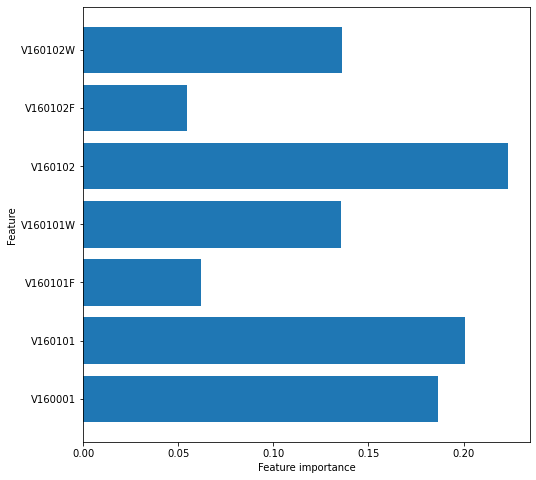

In [30]:
plot_feature_importances(forest)